### Work to visualise the vector representation from a mLSTM RNN on primary amino acid sequences taken from UniProtKB
- UniProtKB dataset obtained in early October 2019
- UniRep inference performed end of October 2019
- Appropriate amino acid sequences subsetted from the SCOP 1.75 dataset
- Final figure is a replication of previous work (Alley et al. 2019 fig. 2c) on a similar dataset (SCOP 1.67)

In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123

In [2]:
# set up file paths
REP_PATH = '/Users/wyssuser/UniRep_Homology/Representations/merged_avg_hidden.npy'
SCOP175_DF_PATH = '/Users/wyssuser/UniRep_Homology/Data/SCOP1.75/DataFrames/SCOP175_95Homology_allinfo.csv'

In [35]:
# load dataframes and array 
unirep_reps = np.load(REP_PATH)
SCOP175_subset = unirep_reps[1283:17451]

df = pd.read_csv(SCOP175_DF_PATH);

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (17,18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# visually inspect df
# first 23 rows are sequence and SCOP data, latter 1900 are a 1900-dim UniRep vector representation of the primary amino acid sequence
df

,0,1,2,3,4,5,6,7,8,9,...,1913,1914,1915,1916,1917,1918,1919,1920,1921,1922
0,SLFEQLGGQAAVQAVTAQFYANIQADATVATFFNGIDMPNQTNKTA...,>d1dlwa_,a.1.1.1,(A:),Protozoan/bacterial,hemoglobin,{Ciliate,(Paramecium,caudatum),[TaxId:,...,0.030804,0.209848,-0.187651,0.045562,-0.150626,0.128028,0.257822,-0.023274,-0.058124,0.017529
1,SLFAKLGGREAVEAAVDKFYNKIVADPTVSTYFSNTDMKVQRSKQF...,>d1dlya_,a.1.1.1,(A:),Protozoan/bacterial,hemoglobin,{Green,alga,(Chlamydomonas,eugametos),...,0.047899,0.102738,-0.117996,0.040931,-0.140732,0.040358,0.199587,0.006843,0.015542,-0.014188
2,STLYEKLGGTTAVDLAVDKFYERVLQDDRIKHFFADVDMAKQRAHQ...,>d1s69a_,a.1.1.1,(A:),Protozoan/bacterial,hemoglobin,{Cyanobacteria,(Synechocystis,"sp.),",pcc,...,0.034296,0.088823,-0.119699,0.057442,-0.098797,0.017484,0.155671,0.014021,0.047450,-0.011873
3,GLLSRLRKREPISIYDKIGGHEAIEVVVEDFYVRVLADDQLSAFFS...,>d1idra_,a.1.1.1,(A:),Protozoan/bacterial,hemoglobin,{Mycobacterium,"tuberculosis,",HbN,[TaxId:,...,0.010540,0.149175,-0.116363,0.027728,-0.125802,0.047706,0.134357,0.027025,0.065830,0.004546
4,KSFYDAVGGAKTFDAIVSRFYAQVAEDEVLRRVYPEDDLAGAEERL...,>d1ngka_,a.1.1.1,(A:),Protozoan/bacterial,hemoglobin,{Mycobacterium,"tuberculosis,",HbO,[TaxId:,...,0.052996,0.101386,-0.179459,0.042724,-0.072297,-0.120808,0.145941,0.013266,0.070073,-0.021276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16163,MSVTQKQPCICGSGEKFKRCCGMYI,>d2i9wa3,g.74.1.1,(A:159-183),Hypothetical,protein,Psyc2064,{Psychrobacter,arcticus,[TaxId:,...,-0.003469,0.199368,-0.003362,0.031591,-0.026733,0.036772,0.032313,0.013039,0.219553,0.012035
16164,MATTMEQEICAHSMTFEECPKCSALQYRNGFY,>d2baia1,g.87.1.1,(A:1-32),Polyprotein,leader,polypeptide,{Mengo,encephalomyocarditis,virus,...,0.059875,0.132486,-0.070140,0.048497,-0.009689,0.010282,0.062439,-0.080163,0.125502,-0.013206
16165,ALADNCPLEHNPDQLDSDSDRIGDTCDNNQDIDEDGHQNNLDNCPY...,>d1ux6a2,g.75.1.1,(A:813-936),Thrombospondin-1,{Human,(Homo,sapiens),[TaxId:,9606]},...,0.055219,-0.021774,0.014940,0.021543,-0.168266,-0.032384,-0.048625,-0.003737,0.571836,0.010801
16166,GHHHHHHLEGGGNAQKSAMARAKNLEKAKAAGKGSQLEANKKAMSI...,>d1wvka_,g.82.1.1,(A:),Expressed,protein,At2g23090/F21P24.15,{Thale,cress,(Arabidopsis,...,0.038136,0.001730,-0.063825,-0.011349,-0.013950,-0.026300,0.050000,0.039386,0.016222,0.109850


In [6]:
# return a list of the functional protein classes in column 2
y = df.iloc[:,2].str.slice(stop=1)
num_y = y.replace(['a','b','c','d','e','f','g'],[0,1,2,3,4,5,6])
arr_y = np.asarray(num_y)

In [11]:
# import principal component analysis function
from sklearn.decomposition import PCA

# reduce the dimensionality of the data by finding the first 50 principal components of the dataset
time_start = time.time()

pca = PCA(n_components=50)
pca_result = pca.fit_transform(SCOP175_subset)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))

print('Cumulative variance explained by 50 principal components: {}'.format(np.sum(pca.explained_variance_ratio_)))

PCA done! Time elapsed: 0.5757067203521729 seconds
Cumulative variance explained by 50 principal components: 0.8331305384635925


In [13]:
# import tSNE function
from sklearn.manifold import TSNE

# run tSNE to embed in 2 dimensions 
time_start = time.time()

pca_tsne = TSNE(random_state=RS).fit_transform(pca_result)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 144.72632908821106 seconds


In [33]:
# function to plot low dimensional unirep vectors, adapted from datacamp
def fscatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(15, 15))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0.1, s=20, c=palette[colors.astype(np.int)],alpha=0.7,edgecolor='black')
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')
    
    
    # create list of protein structural classes
    structs = ['alpha','beta','a/b','a+b','alpha and beta','membrane','small']

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, structs[i], fontsize=16)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

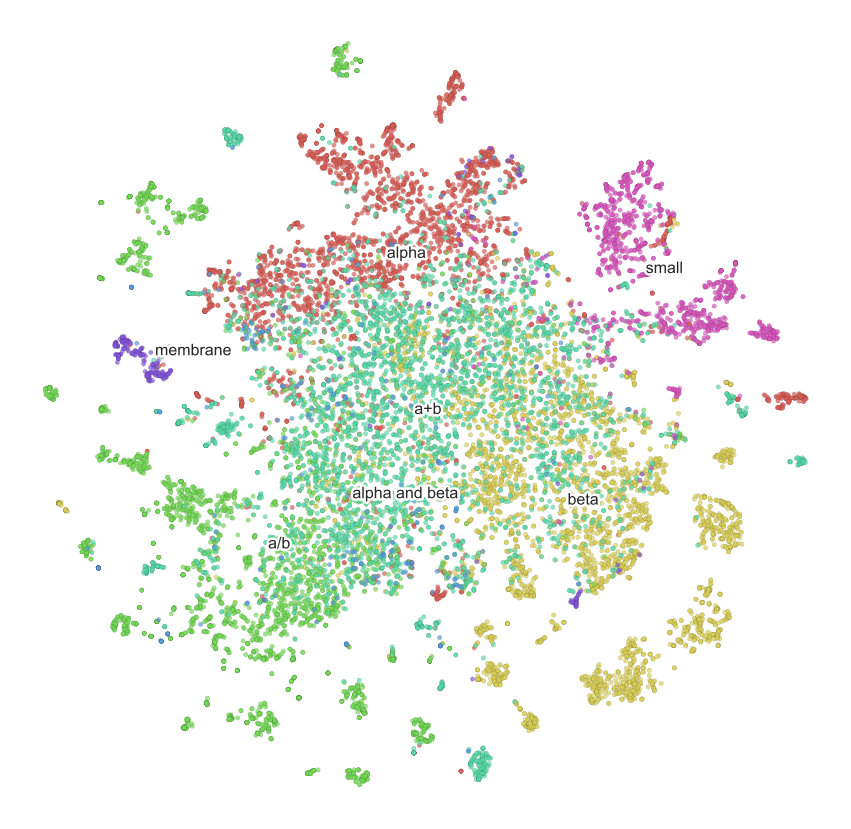

In [34]:
fscatter(pca_tsne, arr_y);